# Laboratorio 1 - Visión por Computadora

- Diego Estuardo Lemus López - 21469
- José Pablo Kiesling Lange - 21581
- Herber Sebastián Silva Muñoz - 21764

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cv2 as cv

import skimage as ski
from skimage import morphology as mo

## 1 . Implementar en Python una función que haga la ecualización de histograma para una imagen en escala de grises (8 bits).

Lectura de Imagen

In [2]:
image_path = 'assets/valley.jpg'

Muestra de imagen cruda

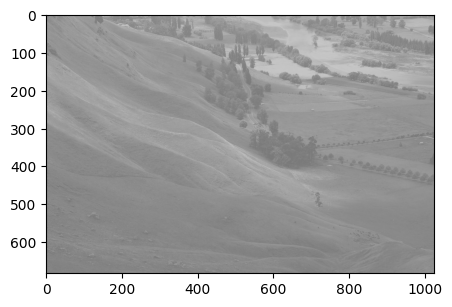

In [3]:
image = plt.imread(image_path)
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.show()

Selección de los primeros 3 canales de la imagen

In [4]:
image = image[:,:,:3]

Convertir la imagen RGB a escala de grises

In [5]:
image = ski.color.rgb2gray(image)

Conretir la imagen a escala de 8 bits

In [6]:
image = (image * 255).astype(np.uint8)

Definición de función para imprimir el histograma de una imagen

In [7]:
def plot_histogram(image, title, ax, vmin=0, vmax=255):
    hist, bins = np.histogram(image, bins=256, range=(vmin, vmax))
    pixnum = image.shape[0] * image.shape[1]
    cdf = hist.cumsum() / pixnum

    ax.bar(bins[:-1], hist / hist.max())
    ax.plot(bins[:-1], cdf, c='orange')
    ax.set_title(title)

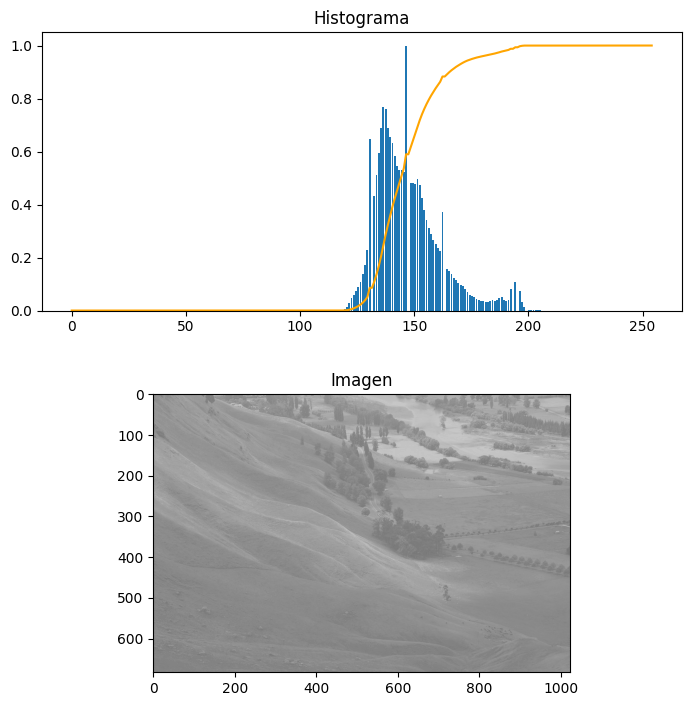

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(8, 8))
plot_histogram(image, "Histograma", axs[0])
axs[1].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("Imagen")
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.3)
plt.show()

#### Equalización de la imagen

Definición de función para ecualizar imágenes

In [9]:
def equalize_image(image):
    hist, _ = np.histogram(image, bins=256, range=(0, 255))
    pixnum = image.shape[0] * image.shape[1]
    cdf = hist.cumsum() / pixnum
    cdf = (cdf * 255).astype(np.uint8)
    
    return cdf[image]

Ecualización de la imagen

In [10]:
image_equalized = equalize_image(image)

Impresión de ecualización

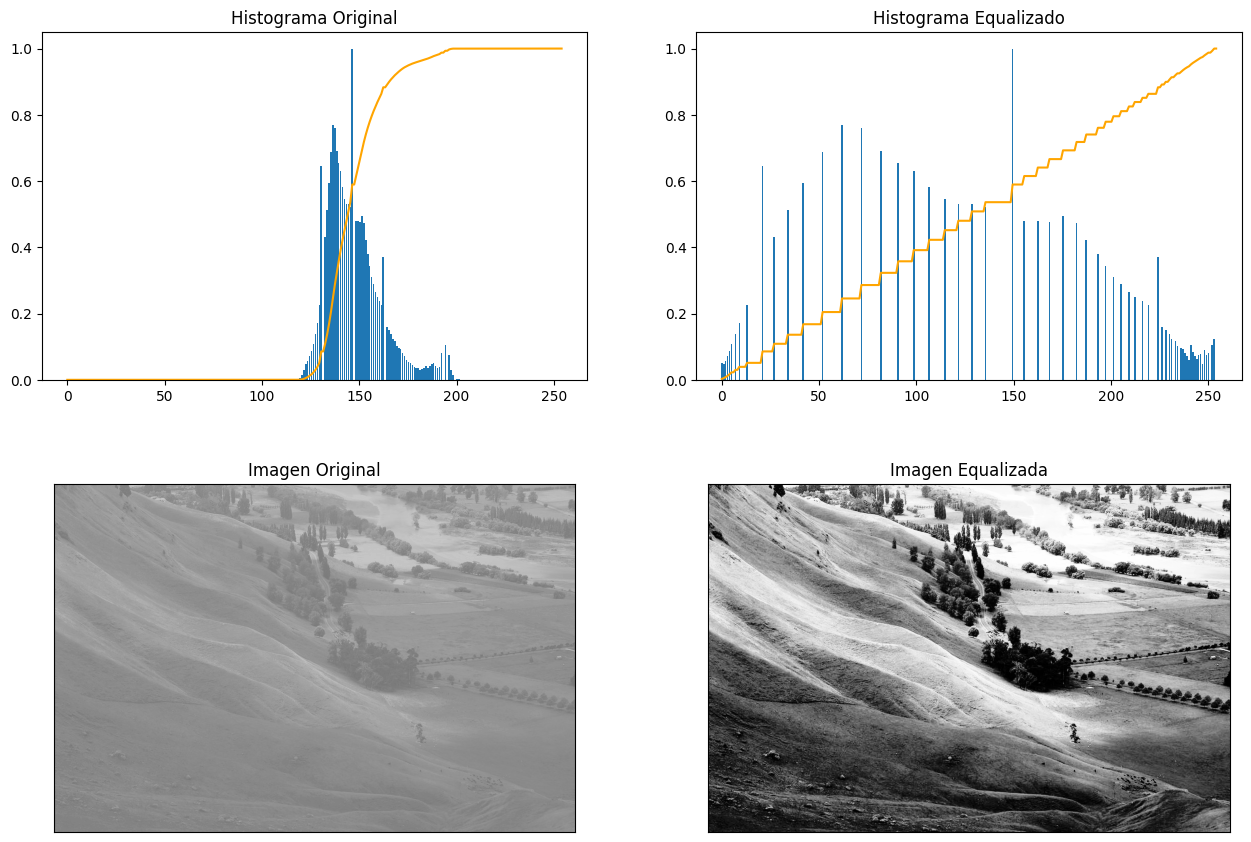

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
plot_histogram(image, "Histograma Original", axs[0, 0])
plot_histogram(image_equalized, "Histograma Equalizado", axs[0, 1])
axs[1, 0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[1, 0].set_title("Imagen Original")
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
axs[1, 1].imshow(image_equalized, cmap='gray', vmin=0, vmax=255)
axs[1, 1].set_title("Imagen Equalizada")
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.3)
plt.show()

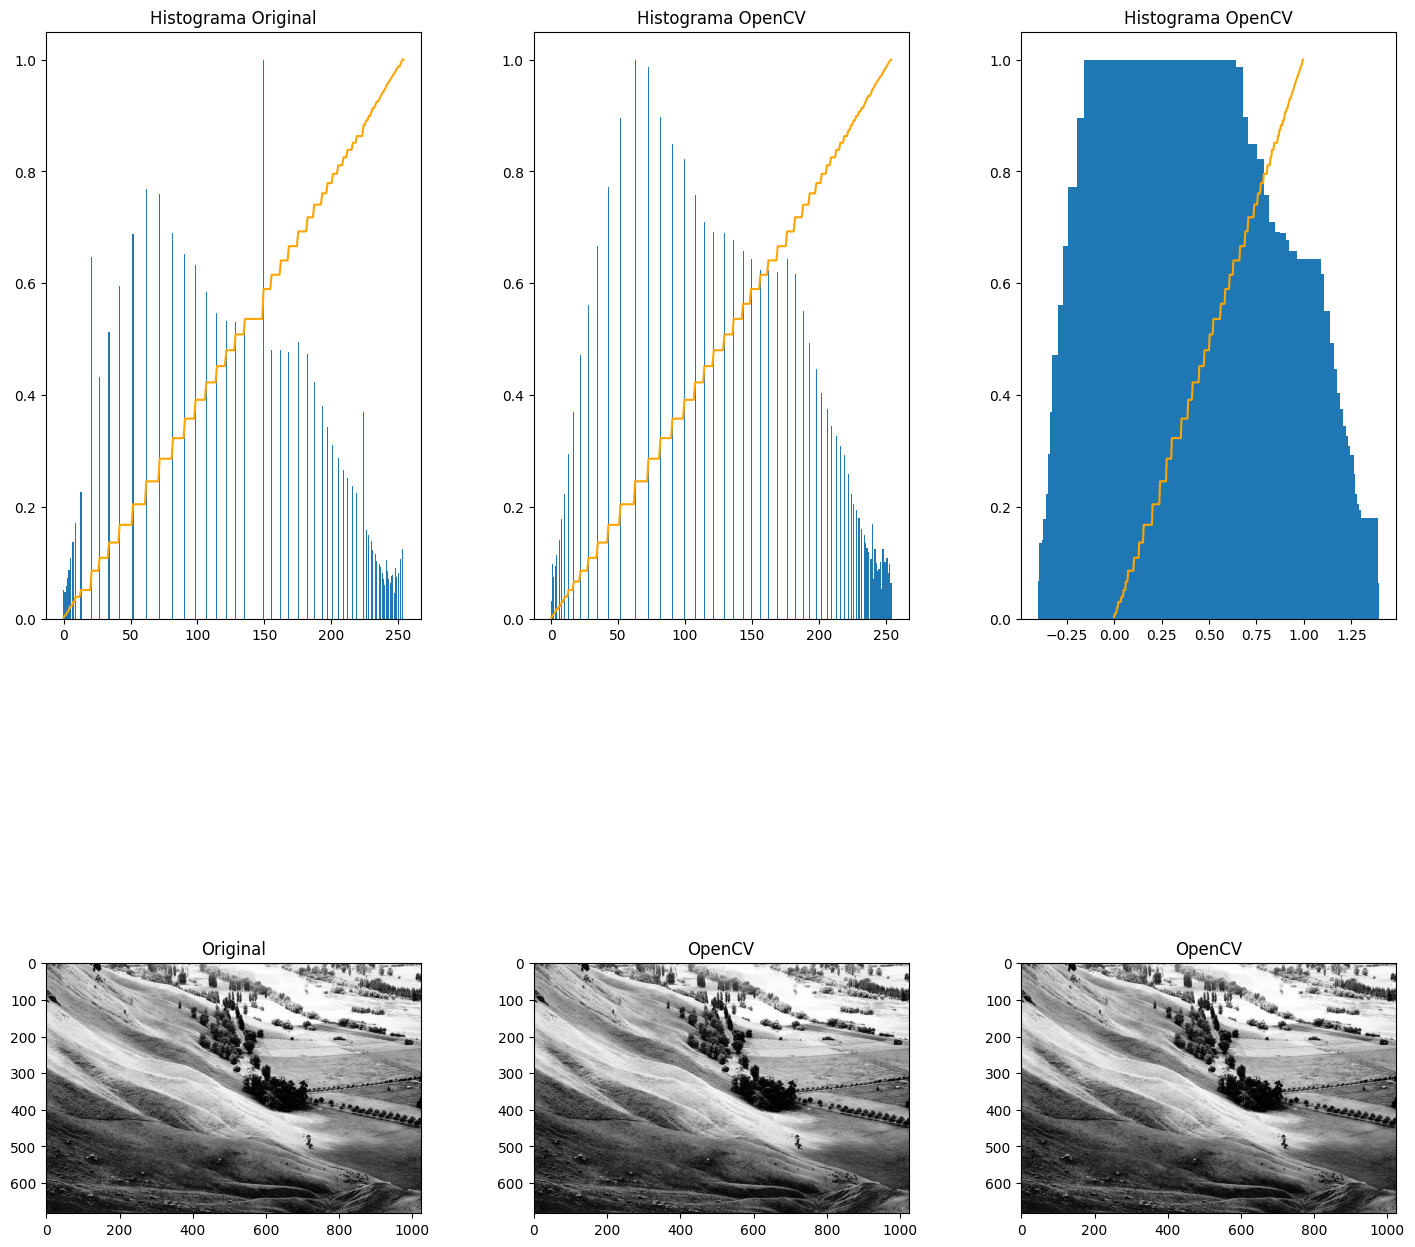

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(15, 15))

# Original
plot_histogram(image_equalized, "Histograma Original", axs[0, 0])
axs[1, 0].imshow(image_equalized, cmap='gray', vmin=0, vmax=255)
axs[1, 0].set_title("Original")

# OpenCV
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
image_equalized = cv.equalizeHist(image)
plot_histogram(image_equalized, "Histograma OpenCV", axs[0, 1])
axs[1, 1].imshow(image_equalized, cmap='gray', vmin=0, vmax=255)
axs[1, 1].set_title("OpenCV")

# skimage
image = ski.io.imread(image_path, as_gray=True)
image_equalized = ski.exposure.equalize_hist(image)
plot_histogram(image_equalized, "Histograma OpenCV", axs[0, 2], vmax=1)
axs[1, 2].imshow(image_equalized, cmap='gray', vmin=0, vmax=1)
axs[1, 2].set_title("OpenCV")

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, hspace=0.3, wspace=0.3)

plt.show()

## 2. Implementar 3 algoritmos para segentación binaria de imágenes.

In [13]:
def ImportImage(image_path):
    I = plt.imread(image_path)
    if I.shape[-1] == 4:
        I = I[..., :3] 
    I = ski.color.rgb2gray(I)
    if (I.min() >= 0 and I.max() <= 1):
        I = (I * 255).astype(np.uint8)
    return I

### Sauvola

In [14]:
import cv2
from skimage.util import dtype_limits
def SauvolaThreshold(image, window_size=15, k=0.2, r=None):
    # Cálculo del rango dinámico de la desviación estándar de la imagen
    if r is None:
        rmin, rmax = dtype_limits(image, clip_negative=False)
        r = 0.5 * (rmax - rmin)

    # Cálculo de la media y la desviación estándar de la imagen
    mean = cv2.boxFilter(image, cv2.CV_32F, (window_size, window_size))
    mean_sq = cv2.boxFilter(image**2, cv2.CV_32F, (window_size, window_size))
    variance = mean_sq - mean**2
    variance = np.maximum(variance, 0)  # Ensure no negative values
    stddev = np.sqrt(variance)

    # Cálculo del treshold
    threshold = mean * (1 + k * ((stddev / r) - 1))

    return threshold

[]

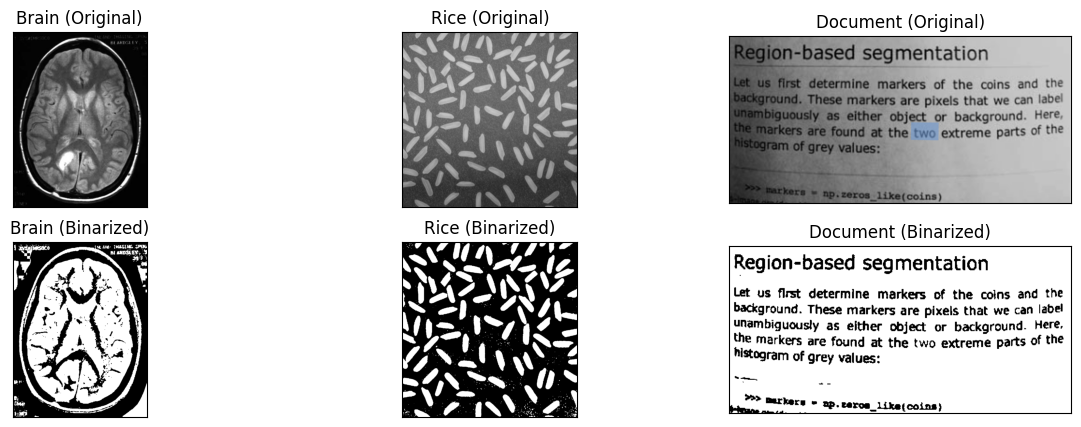

In [15]:
from skimage.filters import threshold_sauvola, threshold_mean

fig, axs = plt.subplots(2, 3, figsize=(15, 5))

I = ImportImage("assets/brain.jpg")
T = SauvolaThreshold(I, window_size=65, k=0.2, r=None)
image = plt.imread("assets/brain.jpg")
Ith = 255 * (I >= T).astype(np.uint8)
axs[0,0].imshow(image)
axs[0,0].set_title("Brain (Original)")
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
axs[1,0].imshow(Ith, cmap='gray', vmin=0, vmax=255)
axs[1,0].set_title("Brain (Binarized)")
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])

I = ImportImage("assets/rice.jpg")
T = SauvolaThreshold(I, window_size=150, k=0.01, r=None)
image = plt.imread("assets/rice.jpg")
Ith = 255 * (I >= T).astype(np.uint8)
axs[0,1].imshow(image)
axs[0,1].set_title("Rice (Original)")
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
axs[1,1].imshow(Ith, cmap='gray', vmin=0, vmax=255)
axs[1,1].set_title("Rice (Binarized)")
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

I = ImportImage("assets/document.png")
T = SauvolaThreshold(I, window_size=95, k=0.2, r=None)
image = plt.imread("assets/document.png")
Ith = 255 * (I >= T).astype(np.uint8)
axs[0,2].imshow(image)
axs[0,2].set_title("Document (Original)")
axs[0,2].set_xticks([])
axs[0,2].set_yticks([])
axs[1,2].imshow(Ith, cmap='gray', vmin=0, vmax=255)
axs[1,2].set_title("Document (Binarized)")
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

### Local

In [16]:
from scipy.ndimage import uniform_filter

def LocalThreshold(image, block_size=35, offset=10):
    I = image.astype(np.float64)
    mean = uniform_filter(I, block_size)
    thresholds = mean - offset
    return thresholds

[]

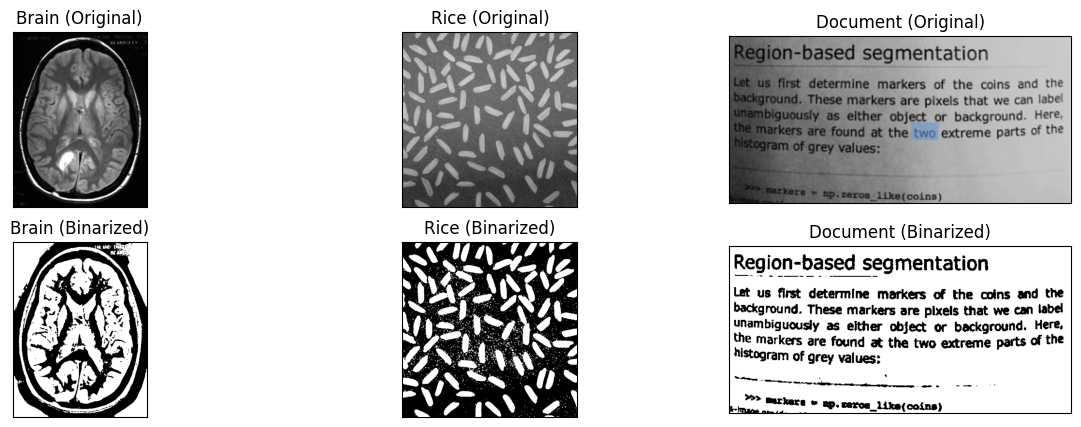

In [17]:
fig, axs = plt.subplots(2, 3, figsize=(15, 5))

I = ImportImage("assets/brain.jpg")
T = LocalThreshold(I, block_size=65)
image = plt.imread("assets/brain.jpg")
Ith = 255 * (I >= T).astype(np.uint8)
axs[0,0].imshow(image)
axs[0,0].set_title("Brain (Original)")
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
axs[1,0].imshow(Ith, cmap='gray', vmin=0, vmax=255)
axs[1,0].set_title("Brain (Binarized)")
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])

I = ImportImage("assets/rice.jpg")
T = LocalThreshold(I, block_size=500)
image = plt.imread("assets/rice.jpg")
Ith = 255 * (I >= T).astype(np.uint8)
axs[0,1].imshow(image)
axs[0,1].set_title("Rice (Original)")
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
axs[1,1].imshow(Ith, cmap='gray', vmin=0, vmax=255)
axs[1,1].set_title("Rice (Binarized)")
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

I = ImportImage("assets/document.png")
T = LocalThreshold(I, block_size=65)
image = plt.imread("assets/document.png")
Ith = 255 * (I >= T).astype(np.uint8)
axs[0,2].imshow(image)
axs[0,2].set_title("Document (Original)")
axs[0,2].set_xticks([])
axs[0,2].set_yticks([])
axs[1,2].imshow(Ith, cmap='gray', vmin=0, vmax=255)
axs[1,2].set_title("Document (Binarized)")
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

### Mean

In [18]:
def MeanTreshold(image):
    return np.mean(image)

[]

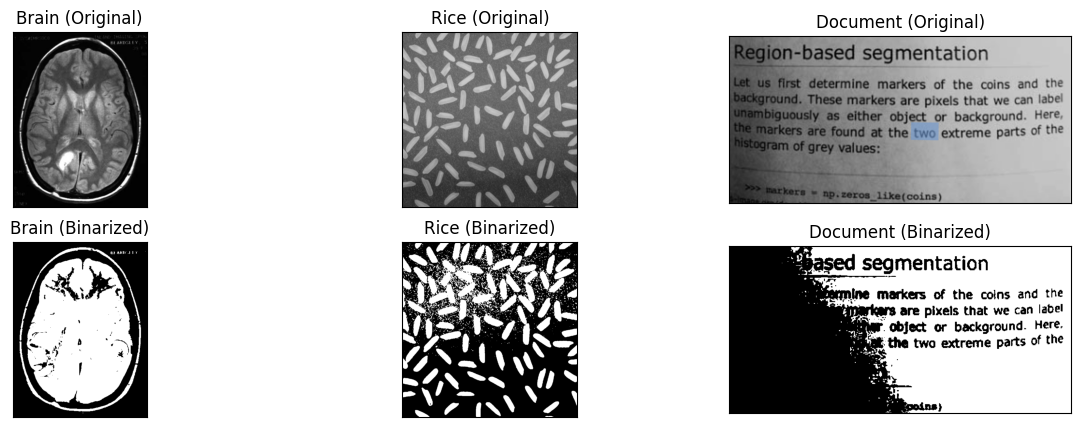

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(15, 5))

I = ImportImage("assets/brain.jpg")
T = MeanTreshold(I)
image = plt.imread("assets/brain.jpg")
Ith = 255 * (I >= T).astype(np.uint8)
axs[0,0].imshow(image)
axs[0,0].set_title("Brain (Original)")
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
axs[1,0].imshow(Ith, cmap='gray', vmin=0, vmax=255)
axs[1,0].set_title("Brain (Binarized)")
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])

I = ImportImage("assets/rice.jpg")
T = MeanTreshold(I)
image = plt.imread("assets/rice.jpg")
Ith = 255 * (I >= T).astype(np.uint8)
axs[0,1].imshow(image)
axs[0,1].set_title("Rice (Original)")
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
axs[1,1].imshow(Ith, cmap='gray', vmin=0, vmax=255)
axs[1,1].set_title("Rice (Binarized)")
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

I = ImportImage("assets/document.png")
T = MeanTreshold(I)
image = plt.imread("assets/document.png")
Ith = 255 * (I >= T).astype(np.uint8)
axs[0,2].imshow(image)
axs[0,2].set_title("Document (Original)")
axs[0,2].set_xticks([])
axs[0,2].set_yticks([])
axs[1,2].imshow(Ith, cmap='gray', vmin=0, vmax=255)
axs[1,2].set_title("Document (Binarized)")
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

## 3. Implementar un algoritmo de segmentación para imágenes RGB, utilizando de fondo un algoritmo de k-medias. Se debe permitir al usuario elegir el parámtero $ k \geq 2 $ del número de segmentos que desea obtener.

Definición de funcion de segmento

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

def segment_image_kmeans(image_path, k):
    image = io.imread(image_path)
    pixels = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    segmented_img = centers[labels].reshape(image.shape).astype(np.uint8)
    
    return segmented_img

### Ejemplos malos

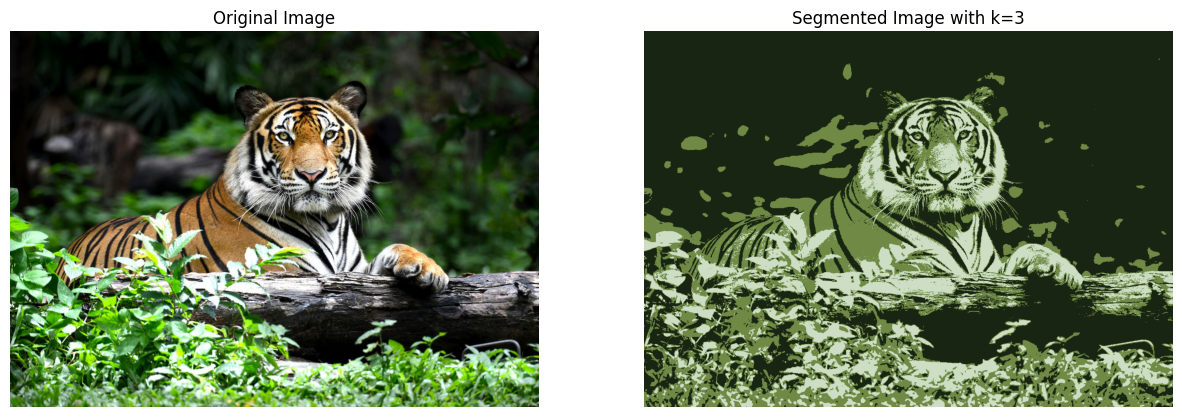

In [21]:
# input k 
k = 3

segmented_image = segment_image_kmeans("assets/tiger.jpg", k)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(io.imread("assets/tiger.jpg"))
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(segmented_image.astype(np.uint8))
ax[1].set_title(f"Segmented Image with k={k}")
ax[1].axis('off')

plt.show()

(-0.5, 255.5, 255.5, -0.5)

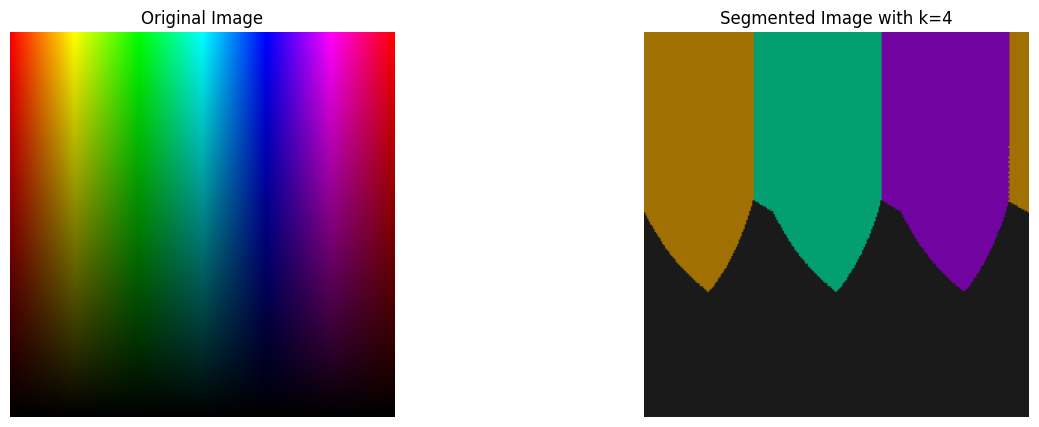

In [22]:
k = 4

segmented_image = segment_image_kmeans("assets/hue.png", k)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(io.imread("assets/hue.png"))
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(segmented_image.astype(np.uint8))
ax[1].set_title(f"Segmented Image with k={k}")
ax[1].axis('off')

### Ejemplos buenos

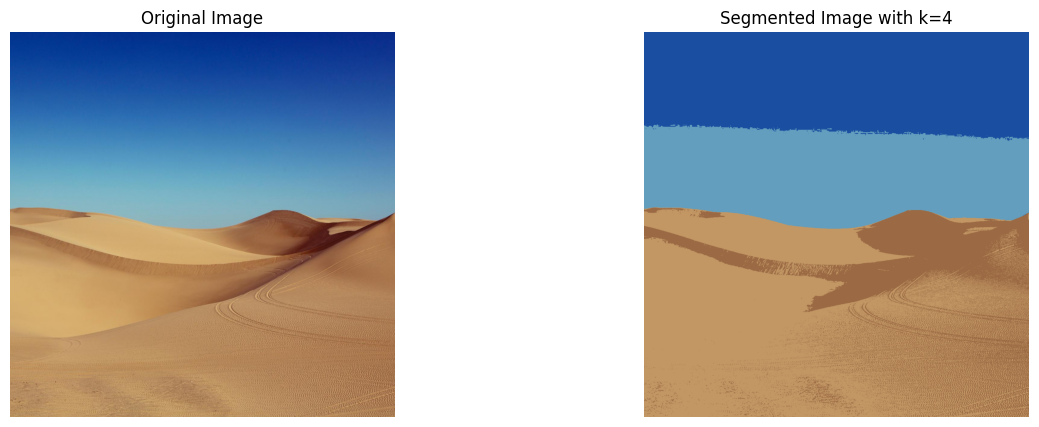

In [23]:
k = 4

segmented_image = segment_image_kmeans("assets/dunes.jpeg", k)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(io.imread("assets/dunes.jpeg"))
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(segmented_image.astype(np.uint8))
ax[1].set_title(f"Segmented Image with k={k}")
ax[1].axis('off')

plt.show()

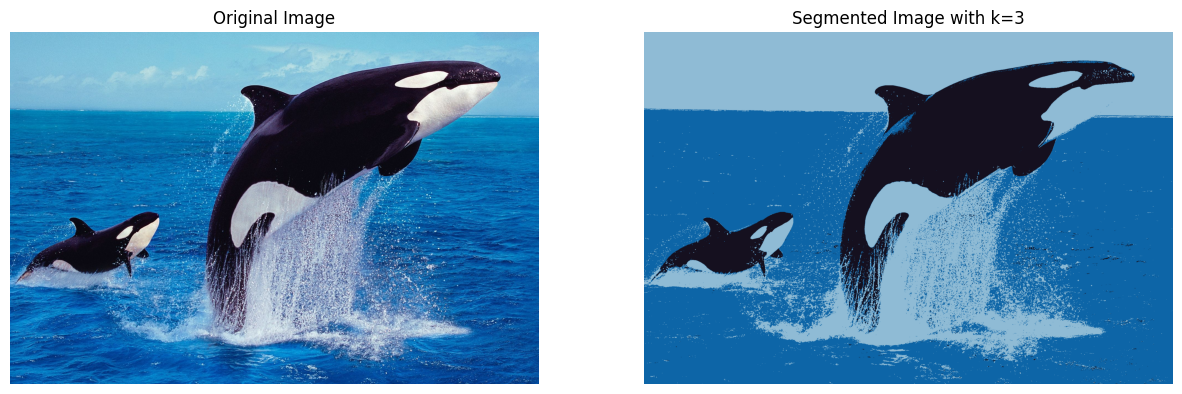

In [24]:
k = 3

segmented_image = segment_image_kmeans("assets/orca.jpg", k)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(io.imread("assets/orca.jpg"))
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(segmented_image.astype(np.uint8))
ax[1].set_title(f"Segmented Image with k={k}")
ax[1].axis('off')

plt.show()

## 4. Considere las imágenes de ```coca-cola.jpeg``` y ```pepsi.png```. En cada una, convierta la imagen a RGB a un espaco de color cromático adecuado, y elabore el histograma del canal de cromaticidad.

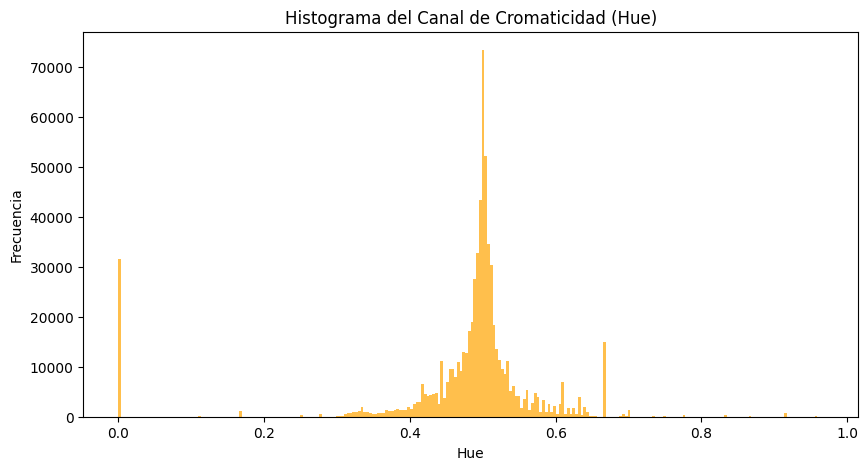

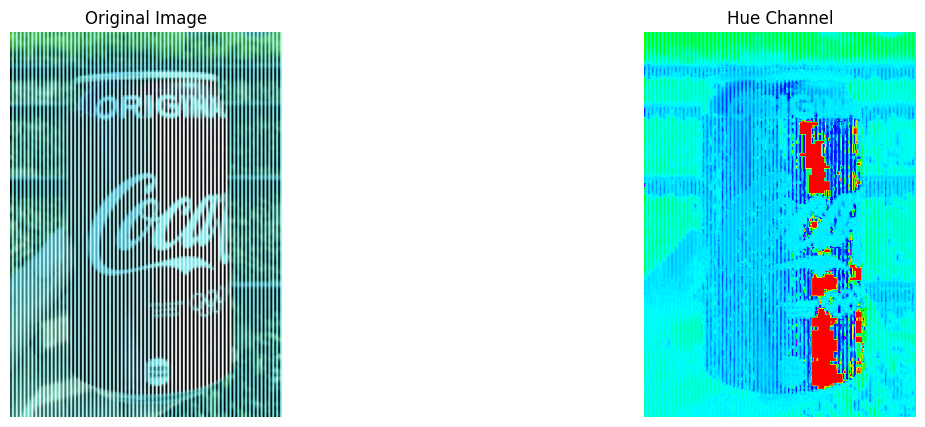

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

# Leer la imagen
image = io.imread("assets/coca-cola.jpeg")

# Convertir la imagen de RGB a HSV
hsv_image = color.rgb2hsv(image)

# Extraer el canal de cromaticidad (Hue)
hue_channel = hsv_image[:, :, 0]

# Elaborar el histograma del canal de cromaticidad
plt.figure(figsize=(10, 5))
plt.hist(hue_channel.ravel(), bins=256, color='orange', alpha=0.7)
plt.title('Histograma del Canal de Cromaticidad (Hue)')
plt.xlabel('Hue')
plt.ylabel('Frecuencia')
plt.show()

# Mostrar la imagen original y el canal de cromaticidad
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(hue_channel, cmap='hsv')
ax[1].set_title("Hue Channel")
ax[1].axis('off')

plt.show()

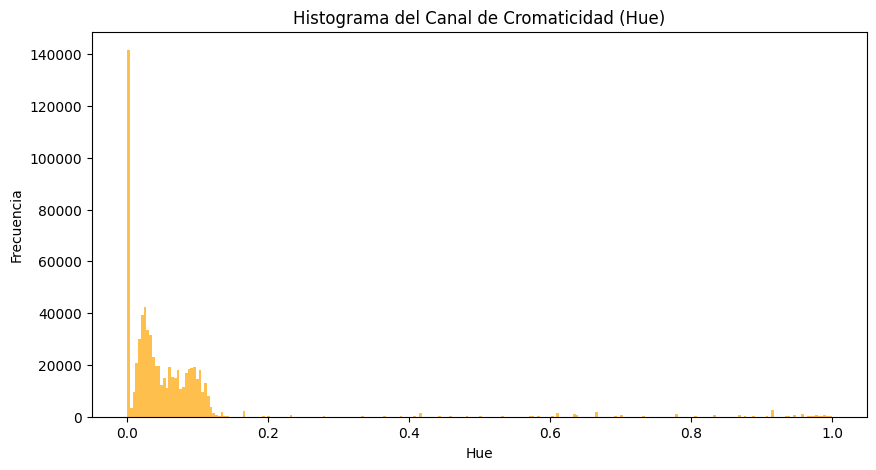

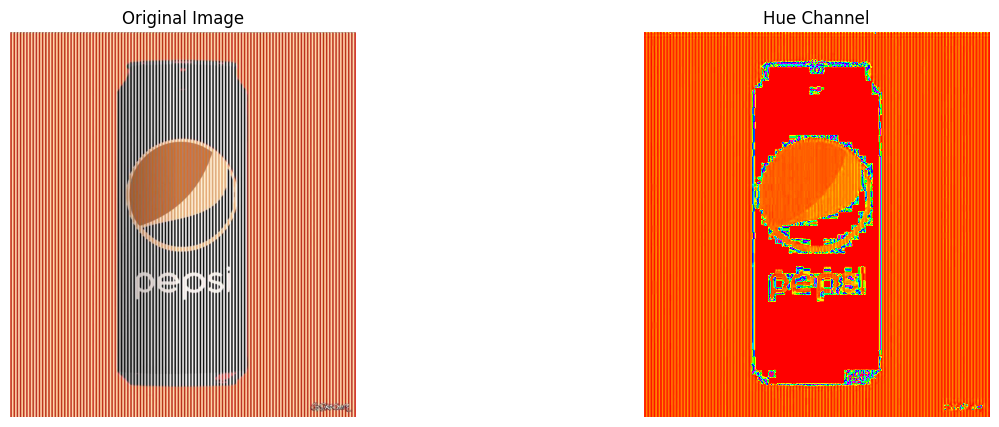

In [26]:
# Leer la imagen
image = io.imread("assets/pepsi.png")

# Convertir la imagen de RGB a HSV
hsv_image = color.rgb2hsv(image)

# Extraer el canal de cromaticidad (Hue)
hue_channel = hsv_image[:, :, 0]

# Elaborar el histograma del canal de cromaticidad
plt.figure(figsize=(10, 5))
plt.hist(hue_channel.ravel(), bins=256, color='orange', alpha=0.7)
plt.title('Histograma del Canal de Cromaticidad (Hue)')
plt.xlabel('Hue')
plt.ylabel('Frecuencia')
plt.show()

# Mostrar la imagen original y el canal de cromaticidad
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(hue_channel, cmap='hsv')
ax[1].set_title("Hue Channel")
ax[1].axis('off')

plt.show()

## 5. Implemente un algoritmo de segmentación binaria que identifique correctamente todos los granos de arroz en la imagen rice.png. (No se puede aplicar un método local.)


#### Método de Riddler-Calvard

In [27]:
import numpy as np

def otsu_threshold(image):
    hist, _ = np.histogram(image, bins=256, range=(0, 255))
    pixnum = image.shape[0] * image.shape[1]
    
    prob = hist / pixnum

    max_var = 0
    threshold = 0

    sum_all = np.sum(np.arange(256) * prob)
    sum_background = 0
    sum_foreground = sum_all
    background = 0
    foreground = 1

    for t in range(1, 255):
        background += prob[t-1]
        foreground -= prob[t-1]

        if background == 0 or foreground == 0:
            continue
        
        sum_background += (t - 1) * prob[t - 1]
        sum_foreground -= (t - 1) * prob[t - 1]

        m0 = sum_background / background if background != 0 else 0
        m1 = sum_foreground / foreground if foreground != 0 else 0

        var = background * foreground * (m0 - m1) ** 2

        if var > max_var:
            max_var = var
            threshold = t

    return threshold


In [28]:
image_path = 'assets/rice.jpg'
image = plt.imread(image_path)
image_original = image

In [29]:
image = image[:,:,:3]

In [30]:
image = ski.color.rgb2gray(image)

In [31]:
image = (image * 255).astype(np.uint8)

#### Equalización de la imagen

In [32]:
image_equalized = equalize_image(image)

#### Cuantización de la imagen (3)

In [33]:
N = 3
k = 256 // N
image_quantized = (image_equalized // k) * k

#### Segmentación binaria

In [34]:
threshold = otsu_threshold(image_quantized)
image_segmented = image_quantized > threshold

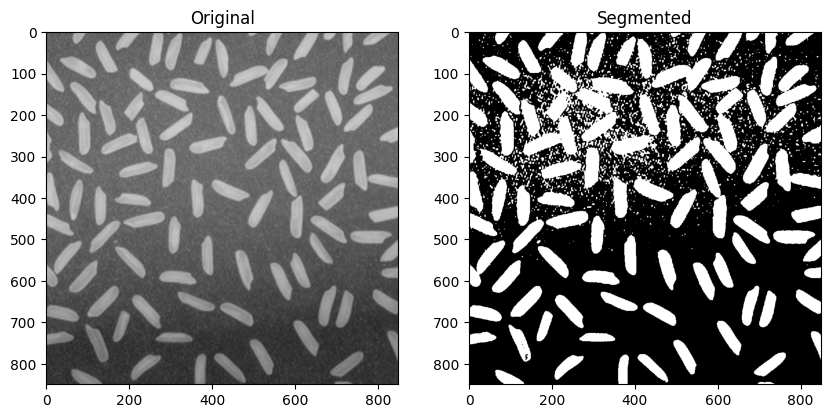

In [35]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_original, cmap='gray')
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(image_segmented, cmap='gray')
plt.title("Segmented")
plt.show()

#### Operaciones morfológicas (opening para eliminar ruido)

In [36]:
disk = mo.diamond(4)
image_open = mo.binary_opening(image_segmented, disk)

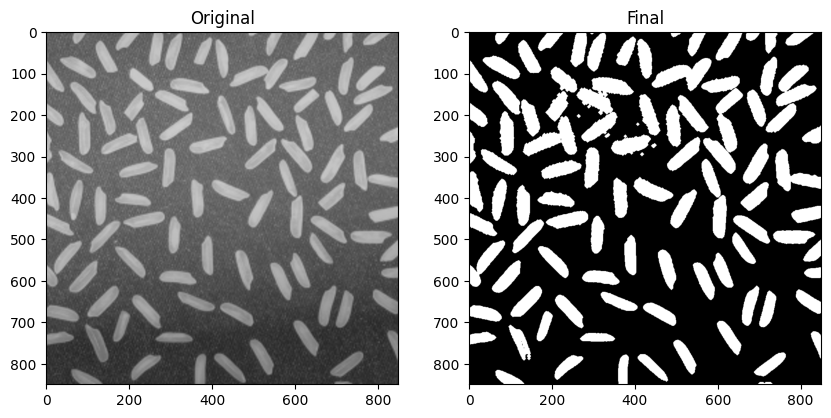

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image_original, cmap='gray')
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(image_open, cmap='gray')
plt.title("Final")
plt.show()